# bs4_naver_relational


In [ ]:
# 네이버 연관 검색어 수집
# 정적페이지: html 데이터 수집(문자열로 수집) -> css-selector 적용을 위해 bs_obj.select(css-selector)


In [4]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup 

In [ ]:
#1 웹서비스 분석: url 알아내기

In [2]:
keyword = '삼성전자'
url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={keyword}'
url

'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=삼성전자'

In [ ]:
#2 알아낸 url로 requests해서 response를 만듬

In [5]:
response = requests.get(url)
response

<Response [200]>

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="삼성전자 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'삼성전자'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'삼성전자'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>삼성전자 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220217.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst
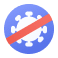
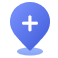
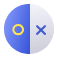
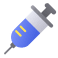
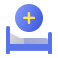

In [6]:
dom = BeautifulSoup(response.text, 'html.parser')
dom

In [ ]:
# li 엘리먼트 10개 선택

In [8]:
elements = dom.select('.lst_related_srch > li')
len(elements)
elements[0]

<li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EA%B0%80&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0" onclick="return goOtherCR(this, 'a=rsk_top*q.list1&amp;r=1&amp;u=' + urlencode(this.href))"> <div class="tit">삼성전자 주가</div> </a> </li>

In [11]:
element= elements[0]
element.select_one('.tit').text

'삼성전자 주가'

In [12]:
keywords = [element.select_one('.tit').text for element in elements]
keywords

['삼성전자 주가',
 '삼성전자 배당금',
 '삼성전자 주식',
 '삼성전자 특별보너스',
 '삼성전자 배당금 지급일',
 '오늘 삼성전자 주가',
 '삼성전자 성과급',
 '삼성 전자레인지',
 '삼성전자 채용',
 '삼성전자 보너스']

In [ ]:
#3 data(html)을 텍스트로 만듬
# data(html) > 

In [14]:
def relational_keyword(keyword):
    url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={keyword}'

    response = requests.get(url)

    dom = BeautifulSoup(response.text, 'html.parser')
    
    elements = dom.select('.lst_related_srch > li')
    keywords = [element.select_one('.tit').text for element in elements]
    return keywords



In [15]:
relational_keyword('삼성전자')

['삼성전자 주가',
 '삼성전자 배당금',
 '삼성전자 주식',
 '삼성전자 특별보너스',
 '삼성전자 배당금 지급일',
 '오늘 삼성전자 주가',
 '삼성전자 성과급',
 '삼성 전자레인지',
 '삼성전자 채용',
 '삼성전자 보너스']

# 07 mois

* 행정안전부

    - 정적페이지 데이터 수집 > html 수집 > bs4, css-selector 써야함
    - post 방식을 써야함
    - 여러개의 페이지 데이터 수집
 

In [16]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [ ]:
#1 웹페이지 분석 url 획득

In [21]:
url = 'https://www.mois.go.kr/frt/bbs/type010/commonSelectBoardList.do?bbsId=BBSMSTR_000000000008'
url

page = 3
params = {
    'nttId': '0',
    'bbsTyCode': 'BBST03',
    'bbsAttrbCode': 'BBSA03',
    'authFlag': 'Y',
    'pageIndex': page,
    'cal_url': '/sym/cal/EgovNormalCalPopup.do',
    'searchCnd': '0',
}



In [ ]:
#2 requests(url) > response: html

In [23]:
response = requests.post(url, params)
response

<Response [200]>

In [ ]:
#3 html(str) > bs_obj.select(css-selector) > text > Dataframe

In [24]:
dom = BeautifulSoup(response.text, 'html.parser')

In [25]:
elements = dom.select("#print_area > div.table_wrap.type_01 > form > table > tbody > tr")
len(elements)


10

In [27]:
element = elements[0]
element

data = {
    'no': element.select('td')[0].text.strip(),
    'title': element.select('td')[1].text.strip(),
    'writer': element.select('td')[3].text.strip(),
    'date': element.select('td')[4].text.strip(),
    'pv': element.select('td')[5].text.strip(),
    'link': "https://www.mois.go.kr" + element.select('td')[1].select_one('a').get('href')
}
data

{'no': '12931',
 'title': '사이버대학 성적·졸업증명서도 모바일 전자증명서로 발급한다',
 'writer': '공공지능정책과',
 'date': '2022.02.15.',
 'pv': '852',
 'link': 'https://www.mois.go.kr/frt/bbs/type010/commonSelectBoardArticle.do;jsessionid=8Xq2gsPkdlFvuXDrSN77TIrO.node40?bbsId=BBSMSTR_000000000008&nttId=90455'}

In [29]:
datas = []
for element in elements:
    datas.append({
        'no': element.select('td')[0].text.strip(),
        'title': element.select('td')[1].text.strip(),
        'writer': element.select('td')[3].text.strip(),
        'date': element.select('td')[4].text.strip(),
        'pv': element.select('td')[5].text.strip(),
        'link': "https://www.mois.go.kr" + element.select('td')[1].select_one('a').get('href')
    })

df = pd.DataFrame(datas)
df.head()

,no,title,writer,date,pv,link
0,12931,사이버대학 성적·졸업증명서도 모바일 전자증명서로 발급한다,공공지능정책과,2022.02.15.,852,https://www.mois.go.kr/frt/bbs/type010/commonS...
1,12930,"2022 지방행정혁신, 주민이 체감하는 확실한 변화 만든다",지역사회혁신정책과,2022.02.15.,699,https://www.mois.go.kr/frt/bbs/type010/commonS...
2,12929,적극행정을 일상적 공직문화로 자리매김하여 국민이 현장에서 체감하는 성과를 창출하겠습니다,지역사회혁신정책과,2022.02.15.,577,https://www.mois.go.kr/frt/bbs/type010/commonS...
3,12928,'가명정보 결합전문기관 실무협의회' 출범,공공데이터정책과,2022.02.14.,666,https://www.mois.go.kr/frt/bbs/type010/commonS...
4,12927,코로나19로 지친 국민들에게 지방세 지원을 강화한다,지방세정책과,2022.02.14.,967,https://www.mois.go.kr/frt/bbs/type010/commonS...


In [ ]:
#4 function

In [ ]:
#5 여러 페이지 데이터 수집

# 08 G-market 베스트 200 데이터 수집

* 상품 데이터 수집
* 상품 이미지 데이터 수집


In [30]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
#1 웹서비스 분석: url

In [40]:
url = 'https://corners.gmarket.co.kr/Bestsellers'

In [ ]:
#2 request(url)  > response(html)

In [41]:
response = requests.get(url)
response

<Response [200]>

In [ ]:
#3 html(str) > bs, css-selector > Dataframe

In [ ]:
# bs 객체 만들기

In [42]:
dom = BeautifulSoup(response.text, 'html.parser')
dom

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<title>G마켓 - G마켓 베스트</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="width=980" id="viewport" name="viewport"/>
<meta content="all" name="ROBOTS"/>
<meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/>
<meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/>
<meta content="(주)이베이코리아" name="author"/>
<meta

In [ ]:
# 상품 객체 200개 선택

In [43]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li')
len(elements)

200

In [ ]:
# 각상품에서(상품명, 가격정보, 이미지)

In [ ]:
element = elements[0]
datas = {
    'title': elements.select_one('itemname').text,
    'link': elements.select_one('itemname').get('href'),
    
    }

In [ ]:
#데이터프레임으로 만들기

In [ ]:
#4 downlaod images